In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from europePMC_wrapper import *
import pandas as pd
import pickle

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

import scispacy
import spacy 


nlp_bc5cdr = spacy.load("en_ner_bc5cdr_md")

nlp_bionlp13cg = spacy.load("en_ner_bionlp13cg_md")


c:\Users\catarina\anaconda3\envs\projeto\lib\site-packages\spacy\util.py:877: UserWarning: [W095] Model 'en_ner_bionlp13cg_md' (0.4.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


# Extraction of articles with keywords

In [4]:
papers_mtb = pmc_to_papers('Mycobacterium tuberculosis')

getting papers


In [ ]:
papers_tuberculosis = pmc_to_papers('tuberculosis')

In [ ]:
papers_mtb = get_annotations_paper_instances(papers_mtb)
with open ('papers_mtb_annotated.pkl', 'wb') as f:
    pickle.dump(papers_mtb, f)

In [ ]:
papers_tuberculosis = get_annotations_paper_instances(papers_tuberculosis)
with open ('tb_papers_annotated.pkl', 'wb') as f:
    pickle.dump(papers_tuberculosis, f)

In [ ]:
len(papers_tuberculosis)

In [ ]:
len(papers_mtb)

In [ ]:
print(papers_mtb)

In [ ]:
data = {'id':[], 'title':[], 'abstract':[], 'title_abstract':[], 'keyword':[]}

In [ ]:
for paper in papers_tuberculosis:
    data['id'].append(paper.id)
    data['title'].append(paper.title)
    data['abstract'].append(paper.abstract)
    data['title_abstract'].append(paper.title_abstract)
    data['keyword'].append(paper.query_keyword)

In [ ]:
for paper in papers_mtb:
    data['id'].append(paper.id)
    data['title'].append(paper.title)
    data['abstract'].append(paper.abstract)
    data['title_abstract'].append(paper.title_abstract)
    data['keyword'].append(paper.query_keyword)

## Annotations

In [270]:
papers_tuberculosis[0].annotations

{'Diseases': ['tuberculosis', 'drug-resistant tuberculosis', 'curb'],
 'Chemicals': ['linezolid',
  'bedaquiline',
  'clofazimine',
  'nitroimidazoles',
  'pyrazinamide'],
 'Gene_Proteins': [],
 'Organisms': []}

In [ ]:
papers_mtb[1].annotations

In [8]:
with open('papers_mtb_annotated.pkl', 'rb') as file:
    paper_instances = pickle.load(file)


__scispaCy annotations__

In [9]:
def process_paper_instances(target_id, paper_instances):
    results = []

    for paper in paper_instances:
        if paper.id == target_id:
            doc_bionlp13cg = nlp_bionlp13cg(paper.title_abstract)
            doc_bc5cdr = nlp_bc5cdr(paper.title_abstract)

            print("Title:", paper.title)

            unique_annotations = set()

            for exact in doc_bionlp13cg.ents:
                annotation = (exact.text, exact.label_)
                if annotation not in unique_annotations:
                    unique_annotations.add(annotation)
                    print(exact.text, exact.label_)
                    if exact.label_ == 'CHEMICAL':
                        if exact.text.lower().rstrip() not in paper.annotations_scispacy['Chemicals']:
                            paper.annotations_scispacy['Chemicals'].append(exact.text.lower().rstrip())
                        if exact.label_ == 'DISEASE':
                            if exact.text not in paper.annotations_scispacy['Diseases']:
                                paper.annotations_scispacy['Diseases'].append(exact.text)
                        if exact.label_ == 'GENE_OR_GENE_PRODUCT':
                            if exact.text.lower().rstrip() not in paper.annotations_scispacy['Chemicals']:
                                paper.annotations_scispacy['Chemicals'].append(exact.text.lower().rstrip())
                        elif exact.label_ == 'ORGANISM':
                            if exact.text.lower().rstrip() not in paper.annotations_scispacy['Organisms']:
                                paper.annotations_scispacy['Organisms'].append(exact.text.lower().rstrip())


            for exact in doc_bc5cdr.ents:
                annotation = (exact.text, exact.label_)
                if annotation not in unique_annotations:
                    unique_annotations.add(annotation)
                    print(exact.text, exact.label_)
                    if exact.label_ == 'CHEMICAL':
                        if exact.text.lower().rstrip() not in paper.annotations_scispacy['Chemicals']:
                            paper.annotations_scispacy['Chemicals'].append(exact.text.lower().rstrip())
                    elif exact.label_ == 'DISEASE':
                        if exact.text not in paper.annotations_scispacy['Diseases']:
                            paper.annotations_scispacy['Diseases'].append(exact.text)
            
            paper_results = {
                'title': paper.title,
                'abstract': paper.abstract,
                'entities': []
            }

            for exact in doc_bionlp13cg.ents:
                paper_results['entities'].append({
                    'text': exact.text,
                    'label': exact.label_
                })

            for exact in doc_bc5cdr.ents:
                paper_results['entities'].append({
                    'text': exact.text,
                    'label': exact.label_
                })

            results.append(paper_results)
            print(paper.annotations_scispacy)
        
            break

    return results


__Europe PMC annotations__

In [10]:
def get_paper_annotations(target_id, paper_instances):
    target_paper = None
    for paper_instance in paper_instances:
        if paper_instance.id == target_id:
            target_paper = paper_instance
            break
    
    
    target_paper = get_annotations(target_paper)
    
    diseases_annotations = target_paper.annotations['Diseases']
    chemicals_annotations = target_paper.annotations['Chemicals']
    gene_proteins_annotations = target_paper.annotations['Gene_Proteins']
    organisms_annotations = target_paper.annotations['Organisms']
    
    print("Diseases Annotations:", diseases_annotations)
    print("Chemicals Annotations:", chemicals_annotations)
    print("Gene/Proteins Annotations:", gene_proteins_annotations)
    print("Organisms Annotations:", organisms_annotations)


__Results and Comparisons__

In [11]:
target_id = "37261290"
results = process_paper_instances(target_id, paper_instances)
print("\n")
get_paper_annotations(target_id, paper_instances)
print("\n")
print(paper_instances[0].compare_annotations())

Title: Long-term economic evaluation of the recombinant <i>Mycobacterium tuberculosis</i> fusion protein (EC) test for the diagnosis of <i>Mycobacterium tuberculosis</i> infection.
EC CELL
Background:</b GENE_OR_GENE_PRODUCT
tuberculin (TB-PPD) GENE_OR_GENE_PRODUCT
skin ORGAN
b>Objective:</b GENE_OR_GENE_PRODUCT
TB-PPD GENE_OR_GENE_PRODUCT
b>Methods:</b GENE_OR_GENE_PRODUCT
people ORGANISM
tuberculosis</i>. GENE_OR_GENE_PRODUCT
tree-Markov GENE_OR_GENE_PRODUCT
b>Results:</b GENE_OR_GENE_PRODUCT
-119,800.7381 CNY/QALY GENE_OR_GENE_PRODUCT
b>Conclusion:</b GENE_OR_GENE_PRODUCT
Mycobacterium CHEMICAL
Tuberculosis DISEASE
TB-PPD DISEASE
tuberculosis DISEASE
infection DISEASE
{'Diseases': ['Tuberculosis', 'TB-PPD', 'tuberculosis', 'infection'], 'Chemicals': ['mycobacterium'], 'Gene_Proteins': [], 'Organisms': []}


Diseases Annotations: ['tuberculosis', 'infection']
Chemicals Annotations: []
Gene/Proteins Annotations: ['ppd']
Organisms Annotations: ['mycobacterium tuberculosis', 'm. tubercu

In [12]:
target_id = "PPR639016"
results = process_paper_instances(target_id, paper_instances)
print("\n")
get_paper_annotations(target_id, paper_instances)
print("\n")
print(paper_instances[67].compare_annotations())

Title: A new method for the detection of Mycobacterium tuberculosis based on the CRISPR/Cas system
CRISPR/Cas systemObject CELLULAR_COMPONENT
h4>Methods GENE_OR_GENE_PRODUCT
/h4 GENE_OR_GENE_PRODUCT
CRISPR GENE_OR_GENE_PRODUCT
DNA CELLULAR_COMPONENT
recombinase GENE_OR_GENE_PRODUCT
nucleic acid GENE_OR_GENE_PRODUCT
RAA TISSUE
RAA CELL
BACTEC 960 culture CELL
MTB GENE_OR_GENE_PRODUCT
TB-CRISPR GENE_OR_GENE_PRODUCT
patients ORGANISM
h4>Results GENE_OR_GENE_PRODUCT
CRISPR-Cas12a GENE_OR_GENE_PRODUCT
BACTCE960 culture GENE_OR_GENE_PRODUCT
AUC GENE_OR_GENE_PRODUCT
9.870-22.035 GENE_OR_GENE_PRODUCT
NLR GENE_OR_GENE_PRODUCT
MTB CELL
Mycobacterium tuberculosis DISEASE
MTB CHEMICAL
Tuberculosis DISEASE
TB DISEASE
tuberculosis DISEASE
{'Diseases': ['Mycobacterium tuberculosis', 'Tuberculosis', 'TB', 'tuberculosis'], 'Chemicals': ['mtb'], 'Gene_Proteins': [], 'Organisms': []}


Diseases Annotations: ['zoonoses', 'tuberculosis']
Chemicals Annotations: []
Gene/Proteins Annotations: ['cas', 'recombi

In [13]:
target_id = "36118045"
results = process_paper_instances(target_id, paper_instances)
print("\n")
get_paper_annotations(target_id, paper_instances)
print("\n")
print(paper_instances[71].compare_annotations())

Title: Transcriptional regulation and drug resistance in <i>Mycobacterium tuberculosis</i>.
human ORGANISM
prodrugs SIMPLE_CHEMICAL
WhiB GENE_OR_GENE_PRODUCT
GntR GENE_OR_GENE_PRODUCT
XRE GENE_OR_GENE_PRODUCT
TetR GENE_OR_GENE_PRODUCT
infectious diseases DISEASE
infection DISEASE
tuberculosis DISEASE
Mycobacterium CHEMICAL
TetR CHEMICAL
{'Diseases': ['infectious diseases', 'infection', 'tuberculosis'], 'Chemicals': ['mycobacterium', 'tetr'], 'Gene_Proteins': [], 'Organisms': []}


Diseases Annotations: ['infectious diseases', 'infection', 'tuberculosis']
Chemicals Annotations: []
Gene/Proteins Annotations: []
Organisms Annotations: ['human', 'mycobacterium tuberculosis', 'm. tuberculosis']


Annotations for 'Diseases' are the same.
Different annotations for 'Chemicals': {'tetr', 'mycobacterium'}
Annotations for 'Gene_Proteins' are the same.
Different annotations for 'Organisms': {'mycobacterium tuberculosis', 'm. tuberculosis', 'human'}
None


In [14]:
target_id = "36620019"
results = process_paper_instances(target_id, paper_instances)
print("\n")
get_paper_annotations(target_id, paper_instances)
print("\n")
print(paper_instances[73].compare_annotations())

Title: Anti-tuberculosis drug development <i>via</i> targeting the cell envelope of <i>Mycobacterium tuberculosis</i>.
via</i GENE_OR_GENE_PRODUCT
cell envelope CELLULAR_COMPONENT
Mycobacterium tuberculosis</i CELLULAR_COMPONENT
mycolic acid layer SIMPLE_CHEMICAL
arabinogalactan polysaccharide GENE_OR_GENE_PRODUCT
envelope CELLULAR_COMPONENT
M</i>. GENE_OR_GENE_PRODUCT
host cells CELL
HIV ORGANISM
cell wall CELLULAR_COMPONENT
Mycobacterium CHEMICAL
tuberculosis DISEASE
TB DISEASE
{'Diseases': ['tuberculosis', 'TB'], 'Chemicals': ['mycobacterium'], 'Gene_Proteins': [], 'Organisms': []}


Diseases Annotations: ['extensively drug resistant tuberculosis', 'co-infection', 'tuberculosis']
Chemicals Annotations: ['peptidoglycan', 'mycolic acid', 'arabinogalactan', 'polysaccharide']
Gene/Proteins Annotations: []
Organisms Annotations: ['hiv', 'mycobacterium tuberculosis', 'm. tuberculosis']


Different annotations for 'Diseases': {'extensively drug resistant tuberculosis', 'co-infection', 'TB'

In [15]:
target_id = "37250168"
results = process_paper_instances(target_id, paper_instances)
print("\n")
get_paper_annotations(target_id, paper_instances)
print("\n")
print(paper_instances[103].compare_annotations())

Title: Identification of anti-<i>Mycobacterium tuberculosis</i> agents targeting the interaction of bacterial division proteins FtsZ and SepFe.
anti-<i GENE_OR_GENE_PRODUCT
FtsZ GENE_OR_GENE_PRODUCT
SepFe GENE_OR_GENE_PRODUCT
Mtb</i GENE_OR_GENE_PRODUCT
tubulin-like GENE_OR_GENE_PRODUCT
GTPase GENE_OR_GENE_PRODUCT
cell CELL
SepF GENE_OR_GENE_PRODUCT
FtsZ/SepF GENE_OR_GENE_PRODUCT
yeast two-hybrid CELLULAR_COMPONENT
T0349 GENE_OR_GENE_PRODUCT
mice ORGANISM
FtsZ/SepF SIMPLE_CHEMICAL
GST GENE_OR_GENE_PRODUCT
FP SIMPLE_CHEMICAL
CRISPRi GENE_OR_GENE_PRODUCT
septum ORGAN
Mycobacterium CHEMICAL
Tuberculosis DISEASE
TB DISEASE
Z-ring DISEASE
SepF CHEMICAL
toxicity DISEASE
T0349 CHEMICAL
{'Diseases': ['Tuberculosis', 'TB', 'Z-ring', 'toxicity'], 'Chemicals': ['mycobacterium', 'sepf', 't0349'], 'Gene_Proteins': [], 'Organisms': []}


Diseases Annotations: ['tuberculosis']
Chemicals Annotations: []
Gene/Proteins Annotations: ['gst', 'mtb', 'spr']
Organisms Annotations: ['yeast', 'mice', 'mycobact

In [16]:
target_id = "EA004794"
results = process_paper_instances(target_id, paper_instances)
print("\n")
get_paper_annotations(target_id, paper_instances)
print("\n")
print(paper_instances[8400].compare_annotations())


Title: VACCINE
VACCINE1 GENE_OR_GENE_PRODUCT
EtxB GENE_OR_GENE_PRODUCT
CtxB GENE_OR_GENE_PRODUCT
VtxB GENE_OR_GENE_PRODUCT
herpes virus ORGANISM
HSV-1 ORGANISM
HSV-2 ORGANISM
EBV ORGANISM
VZV ORGANISM
CMV ORGANISM
HHV-6 ORGANISM
HHV-7 ORGANISM
HHV-8 ORGANISM
parainfluenza virus ORGANISM
syncytial virus ORGANISM
hepatitis virus ORGANISM
hepatitis A ORGANISM
B GENE_OR_GENE_PRODUCT
C GENE_OR_GENE_PRODUCT
D viruses SIMPLE_CHEMICAL
hepatitis A virus ORGANISM
hepatitis C virus ORGANISM
Haemophilus influenzae type B GENE_OR_GENE_PRODUCT
Streptococcus pneumoniae ORGANISM
tract ORGAN
Legonella pneumophila GENE_OR_GENE_PRODUCT
Neisseria gonnorheae ORGANISM
HIV-2 ORGANISM
Chlamydia trachomatis ORGANISM
gastrointestinal ORGAN
enteroaggregative E. coli ORGANISM
rotavirus ORGANISM
Salmonella enteritidis ORGANISM
Salmonella typhi CELLULAR_COMPONENT
Helicobacter pylori ORGANISM
Bacillus cereus ORGANISM
Campylobacter jejuni ORGANISM
Streptococcus pyogenes CELL
Streptococcus mutans CELLULAR_COMPONENT
Tr

In [17]:
target_id = "PPR644779"
results = process_paper_instances(target_id, paper_instances)
print("\n")
get_paper_annotations(target_id, paper_instances)
print("\n")
print(paper_instances[114].compare_annotations())


Title: Functional whole genome screen of nutrient-starved<i>Mycobacterium tuberculosis</i>identifies genes involved in antibiotic tolerance
genome CELLULAR_COMPONENT
rifampin SIMPLE_CHEMICAL
isoniazid SIMPLE_CHEMICAL
nutrient-starved CELL
rifampin-hypersusceptible GENE_OR_GENE_PRODUCT
Mtb CELL
moeA1 SIMPLE_CHEMICAL
rv2179c GENE_OR_GENE_PRODUCT
antitubercular MULTI_TISSUE_STRUCTURE
Mycobacterium CHEMICAL
tuberculosis DISEASE
TB DISEASE
deaths DISEASE
infection DISEASE
rifampin CHEMICAL
isoniazid CHEMICAL
moeA1 DISEASE
{'Diseases': ['tuberculosis', 'TB', 'deaths', 'infection', 'moeA1'], 'Chemicals': ['mycobacterium', 'rifampin', 'isoniazid'], 'Gene_Proteins': [], 'Organisms': []}


Diseases Annotations: ['tuberculosis', 'infection']
Chemicals Annotations: ['rifampin', 'isoniazid']
Gene/Proteins Annotations: ['mtb', 'ercc3', 'moea1']
Organisms Annotations: ['mycobacterium tuberculosis']


Different annotations for 'Diseases': {'TB', 'deaths', 'moeA1'}
Different annotations for 'Chemicals'

Creation of a data frame with the articles:

In [ ]:
df = pd.DataFrame(data=data)

In [ ]:
df

In [ ]:
df.to_csv('dataframe_papers.csv')

In [ ]:
df = pd.read_csv('dataframe_papers.csv', sep=',', index_col=0)

In [ ]:
%matplotlib inline

## Exploratory data analysis

## Word clouds

Word clouds provide a visually appealing representation of the most frequent or significant entities, allowing for quick and intuitive understanding of the data.

In [292]:
def generate_wordcloud(title_abstract):
    text = " ".join(title_abstract.values.tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    %matplotlib inline
    plt.show()

In [294]:
tuberculosis_df = df[df['keyword'] == 'tuberculosis']
mtb_df = df[df['keyword'] == 'Mycobacterium tuberculosis']
targets_df = df[df['keyword'] == 'targets']

In [ ]:
generate_wordcloud(tuberculosis_df.title_abstract)

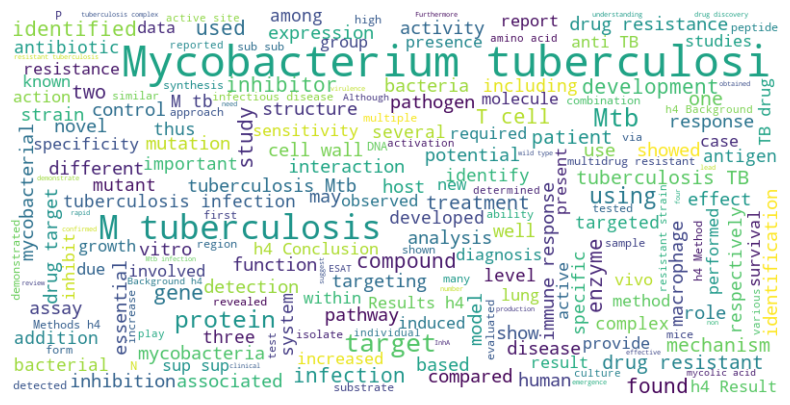

In [295]:
generate_wordcloud(mtb_df.title_abstract)

In [ ]:
generate_wordcloud(targets_df.title_abstract)